In [ ]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [ ]:
## Loading data ##

data = load_data('INE030A01027')
df=data
df.head()


[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,INE077F01027,INE077F01027,INE077F01027,INE077F01027,INE077F01027
0,2020-01-01,252.776810,256.626214,252.776810,256.626214,215
1,2020-01-02,255.251465,255.663911,254.564073,255.343123,354
2,2020-01-03,252.685211,253.876679,251.860319,253.876679,102
3,2020-01-06,252.960098,256.626187,249.660613,256.626187,1344
4,2020-01-08,245.627960,249.294049,245.627960,249.294049,60


In [ ]:
def create_sequences(data, seq_length):
    x = []
    y = []
    for i in range(len(data)-seq_length):
        x.append(data[i:(i+seq_length)])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

In [ ]:
time_step = 30

In [ ]:
df.head(10)

Price,Date,Close,High,Low,Open,Volume
Ticker,,INE077F01027,INE077F01027,INE077F01027,INE077F01027,INE077F01027
0,2020-01-01,252.776810,256.626214,252.776810,256.626214,215
1,2020-01-02,255.251465,255.663911,254.564073,255.343123,354
2,2020-01-03,252.685211,253.876679,251.860319,253.876679,102
3,2020-01-06,252.960098,256.626187,249.660613,256.626187,1344
4,2020-01-08,245.627960,249.294049,245.627960,249.294049,60
5,2020-01-09,246.086197,250.027231,246.086197,250.027231,384
6,2020-01-10,250.256363,257.542725,249.294026,249.294026,649
7,2020-01-13,256.397125,267.624524,256.213810,257.313648,155
8,2020-01-14,254.243210,261.575386,253.876607,256.626173,99


In [ ]:
sc_close = StandardScaler()
df['Close'] = sc_close.fit_transform(df['Close'])
sc_high = StandardScaler()
df['High'] = sc_high.fit_transform(df['High'])
sc_low = StandardScaler()
df['Low'] = sc_low.fit_transform(df['Low'])

In [ ]:
df.head(20)

Price,Date,Close,High,Low,Open,Volume
Ticker,,INE077F01027,INE077F01027,INE077F01027,INE077F01027,INE077F01027
0,2020-01-01,-0.494018,-0.521331,-0.447733,256.626214,215
1,2020-01-02,-0.471210,-0.529989,-0.430978,255.343123,354
2,2020-01-03,-0.494863,-0.546071,-0.456325,253.876679,102
3,2020-01-06,-0.492329,-0.521331,-0.476947,256.626187,1344
4,2020-01-08,-0.559908,-0.587304,-0.514751,249.294049,60
5,2020-01-09,-0.555685,-0.580707,-0.510455,250.027231,384
6,2020-01-10,-0.517249,-0.513084,-0.480383,249.294026,649
7,2020-01-13,-0.460650,-0.422371,-0.415513,257.313648,155
8,2020-01-14,-0.480503,-0.476800,-0.437423,256.626173,99


In [ ]:
X_close, y_close = create_sequences(df['Close'].values, time_step)
X_high, y_high = create_sequences(df['High'].values, time_step)
X_low, y_low = create_sequences(df['Low'].values, time_step)

In [ ]:
X_train, X_test,y_train, y_test = train_test_split(X_close, y_close, test_size=0.3, shuffle=False)

In [ ]:
x_,X_test_high, y_train_high,y_test_high = train_test_split(X_high, y_high, test_size=0.3, shuffle=False)
x_,X_test_low, y_train_low ,y_test_low = train_test_split(X_low, y_low, test_size=0.3, shuffle=False)

In [ ]:
## NOw lets define model ##

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(128, return_sequences=True, input_shape=(time_step, 1)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(128))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse')

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 30, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 30, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 30, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 461,441 (1.76 MB)

 Trainable params: 461,441 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 27s 238ms/step - loss: 0.2497 - val_loss: 0.1331
Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 263ms/step - loss: 0.0657 - val_loss: 0.4108
Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - loss: 0.0545 - val_loss: 0.2716
Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 259ms/step - loss: 0.0388 - val_loss: 0.2057
Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - loss: 0.0328 - val_loss: 0.1242
Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 180ms/step - loss: 0.0307 - val_loss: 0.2301
Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 255ms/step - loss: 0.0471 - val_loss: 0.0768
Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - loss: 0.0281 - val_loss: 0.1043
Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 218ms/step - loss: 0.0261 - val_loss: 0.0650
Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 11s 266ms/step - loss: 0.0228 - val_loss: 0.0877
Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - loss: 0.0264 - val_loss: 0.0852
Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/

In [ ]:
preds = []
for x in X_test:
    x = x.reshape((1, time_step, 1))
    yhat = model.predict(x)
    preds.append(yhat.item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 713ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━

In [ ]:
predicted = sc_close.inverse_transform(np.array(preds).reshape(-1, 1))
y_test_ = sc_close.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
preds_high = []
for x in X_test_high:
    x = x.reshape((1, time_step, 1))
    yhat = model.predict(x)
    preds_high.append(yhat.item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━

In [ ]:
predicted_high = sc_high.inverse_transform(np.array(preds_high).reshape(-1, 1))

In [ ]:
preds_low = []
for x in X_test_low:
    x = x.reshape((1, time_step, 1))
    yhat = model.predict(x)
    preds_low.append(yhat.item())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/

In [ ]:
predicted_low = sc_low.inverse_transform(np.array(preds_low).reshape(-1, 1))

In [ ]:
predicted_close = np.concatenate((sc_close.inverse_transform(y_train), y_test), axis=0)
predicted_high = np.concatenate((sc_high.inverse_transform(y_train_high), predicted_high), axis=0)
predicted_low = np.concatenate((sc_low.inverse_transform(y_train_low), predicted_low), axis=0)

In [ ]:
predicted_low.shape

(1207, 1)

In [ ]:
actual_close = sc_close.inverse_transform(data['Close'].values)
actual_close[:5]

array([[252.77680969],
       [255.25146484],
       [252.68521118],
       [252.96009827],
       [245.62796021]])

In [ ]:
indexes = []
for i in range(len(df)):
    indexes.append(i)

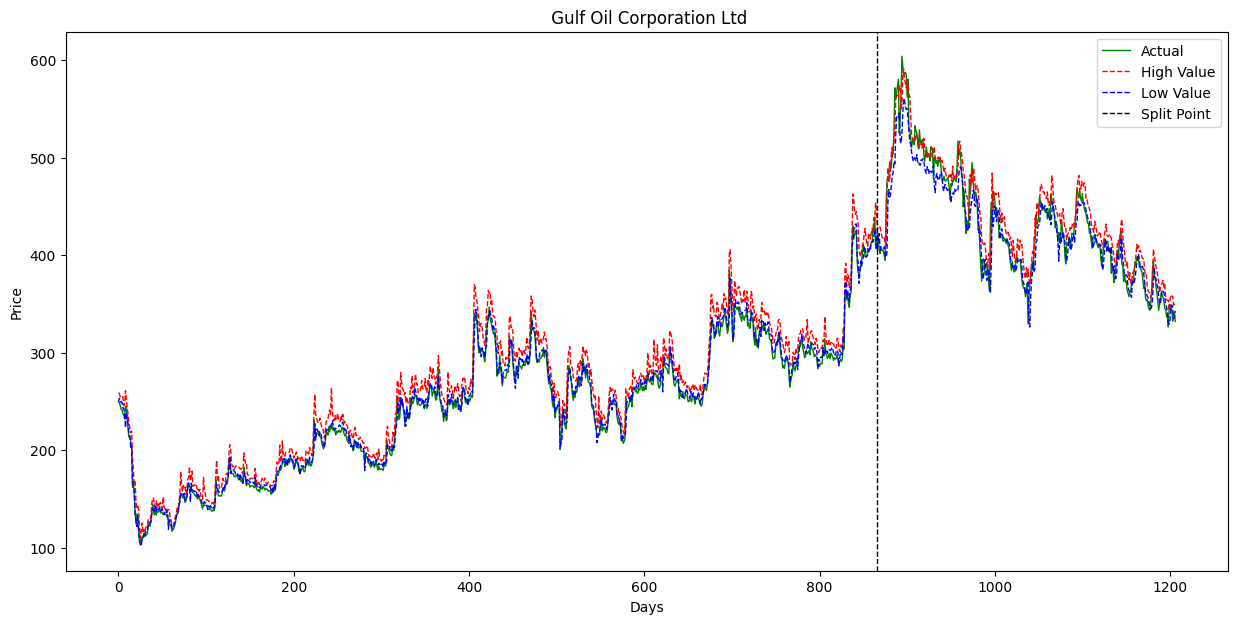

In [ ]:
plt.figure(figsize=(15, 7))
# plt.plot(predicted, label='Predicted')
plt.plot(actual_close[time_step:]*0.97, label='Actual', color = 'green', linewidth = 1)
plt.plot(predicted_high, label = "High Value", color = 'red',linestyle = 'dashed', linewidth=1)
plt.plot(predicted_low, label = "Low Value", color = 'blue',linestyle = 'dashed',linewidth = 1)
plt.axvline(x=0.7*len(df), color='black', linestyle='--', linewidth=1, label="Split Point")
plt.xlabel('Days')
plt.ylabel('Price')
plt.title(' Gulf Oil Corporation Ltd')

plt.legend()
plt.show()

In [ ]:
# y_close = np.concatenate((y_train, y_pred), axis=0)
y_high = np.concatenate((x_,X_test_high), axis=0)
y_low = np.concatenate((x_,X_test_low), axis=0)

In [ ]:
stock_data = pd.DataFrame({
    'Stock1': actual_close[time_step:].flatten(),
    'Stock2': predicted_high.flatten(),
    'Stock3': predicted_close.flatten()
})

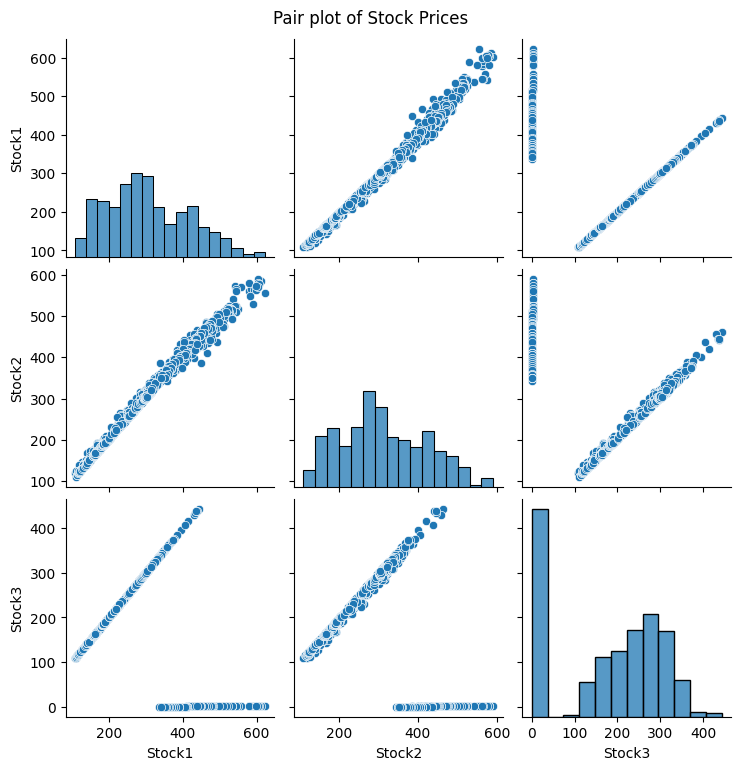

In [ ]:
import seaborn as sns
sns.pairplot(stock_data, diag_kind = 'hist', markers = 'o', corner = False)
plt.suptitle("Pair plot of Stock Prices", y = 1.02)
plt.show()